#### *Programmation sur Grille de Calcul - Générateurs de Variables Aléatoires*

# TP2 - Lois de probabilité

Nous avons vus dans le TP1 que nous pouvons implémenter des générateurs capables de produire des variables pseudo-aléatoires  indépendantes et identiquement distribuées (iid) sur l'intervale [0, 1].

Cependant, comment peut-on faire pour générer des variables aléatoires de distributions différentes ? C'est ce que l'on va voir dans ce TP.

##### Import des bibliothèques

In [42]:
import random
from math import sqrt
from statistics import mean
from typing import List, Callable

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.special import erfinv
from scipy.stats import kurtosis, skew
from statsmodels.graphics.gofplots import qqplot_2samples
from math import exp, tan, e, log, pi

##### Fonctions utilitaires

In [107]:
# Implémentation de runif, un générateur de nombres pseudo-aléatoires iid sur l'intervalle [low, high]
def runif(n: int, low: float = 0, high: float = 1) -> np.ndarray:
    return np.array(np.random.uniform(low=low, high=high, size=n))


def inline_qqplot(func: Callable, lengths: List[int], title: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=len(lengths))
    
    for index, length in enumerate(lengths):
        x = sm.ProbPlot(func(length))
        y = sm.ProbPlot(func(length))
        qqplot_2samples(x, y, line="45", ax=axes[index])
        axes[index].title.set_text(f'Avec n = {length}')
    
    fig.set_size_inches(15, 10)
    plt.suptitle(title, fontsize=20, y=0.98)
    plt.show()

def inline_distplot(func: Callable, lengths: List[int], title: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=len(lengths))

    for index, length in enumerate(lengths):
        sns.distplot(func(n), ax=axes[index])
        axes[index].title.set_text(f'Avec n = {length}')
    
    fig.set_size_inches(15, 10)
    plt.suptitle(title, fontsize=20, y=0.98)
    plt.show()
    
# *** fonctions spéciales pour plot la méthode Box & Muller ***
def inline_qqplot_bm(func: Callable, lengths: List[int], title: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=len(lengths))
    
    for index, length in enumerate(lengths):
        y0, y1 = func(length)
        x = sm.ProbPlot(y0)
        y = sm.ProbPlot(y1)
        qqplot_2samples(x, y, line="45", ax=axes[index])
        axes[index].title.set_text(f'Avec n = {length}')
    
    fig.set_size_inches(15, 10)
    plt.suptitle(title, fontsize=20, y=0.98)
    plt.show()

def inline_distplot_bm(func: Callable, lengths: List[int], title: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=len(lengths))

    for index, length in enumerate(lengths):
        y0, y1 = func(n)
        sns.distplot(y0, ax=axes[index])
        sns.distplot(y1, ax=axes[index])
        axes[index].title.set_text(f'Avec n = {length}')

    fig.legend(labels=['Y_0','Y_1'])
    fig.set_size_inches(15, 10)
    plt.suptitle(title, fontsize=20, y=0.98)
    plt.show()
# ***

## I - Présentation des différentes méthodes

### 1 - Méthode d'inversion

Pour simuler la loi normale, nous allons utiliser la méthode de la loi inverse. Pour ce faire, on dispose de la fonction ``runif()``, un générateur de nombres pseudo-aléatoires iid dans l’intervalle $[0, 1]$ (implémenté ci-dessus).

Pour simuler la loi normale $N(0,1)$, nous devons utiliser l'inverse de sa fonction de répartition qui se calcule avec $erf^-1$ est qui est définie comme suit :

$$\large ■^{-1} (u) = y = \sqrt{2} erf^{-1} (2u - 1)$$

Voici son implémentation en Python :

In [61]:
def loi_normale_rep_inv(n: int) -> np.ndarray:
    x = runif(n)
    return sqrt(2) * erfinv(2 * x - 1)

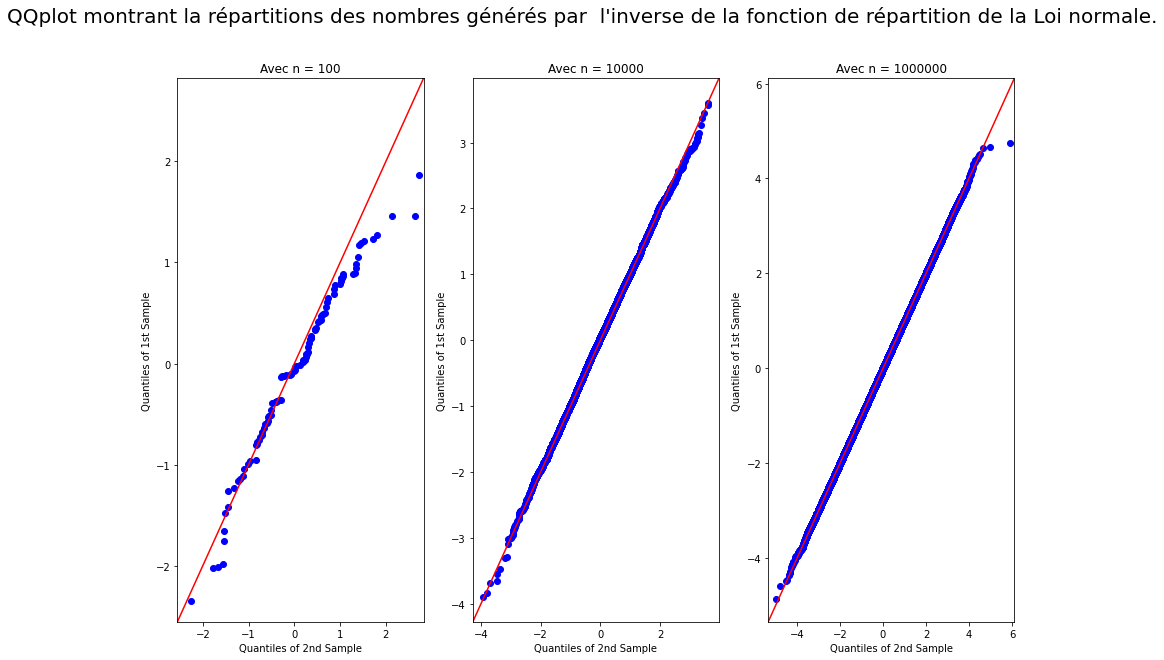

In [93]:
inline_qqplot(loi_normale_rep_inv, [100, 10_000, 1_000_000], 'QQplot montrant la répartitions des nombres générés par  l\'inverse de la fonction de répartition de la Loi normale.')

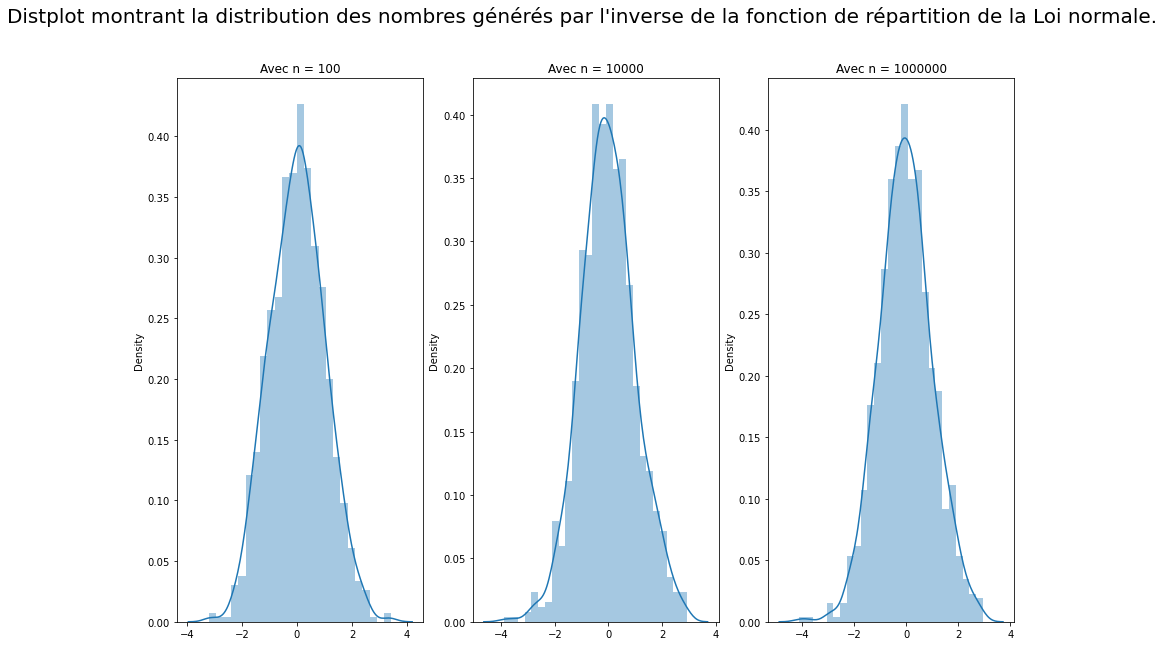

In [95]:
inline_distplot(loi_normale_rep_inv, [100, 10_000, 1_000_000], 'Distplot montrant la distribution des nombres générés par l\'inverse de la fonction de répartition de la Loi normale.')

### 2 - Théorèmre Central Limite

Une application immédiate du Théorème Central Limite est la génération de variables aléatoires normales via une méthode très simple.

Partant de $n$ variables aléatoires $X_i$ de loi uniforme $U_{[0,1]}$, on peut générer une variable
aléatoire $Y$ ayant une loi normale de valeur moyenne $\bar{Y}$ et d'écart-type $σ_Y$ par la relation :

$$\large Y = \frac{\sum \limits_{i=1}^n (X_i) - \frac{n} {2}} {\sqrt{\frac{n} {12}}}$$

Voici son implémentation en Python :

In [66]:
def loi_normale_centrale_limite(n: int) -> np.ndarray:
    vect = []
    for i in range(n):
        x = runif(n)
        vect.append((sum(x) - n / 2) / sqrt(n / 12))
    return np.array(vect)

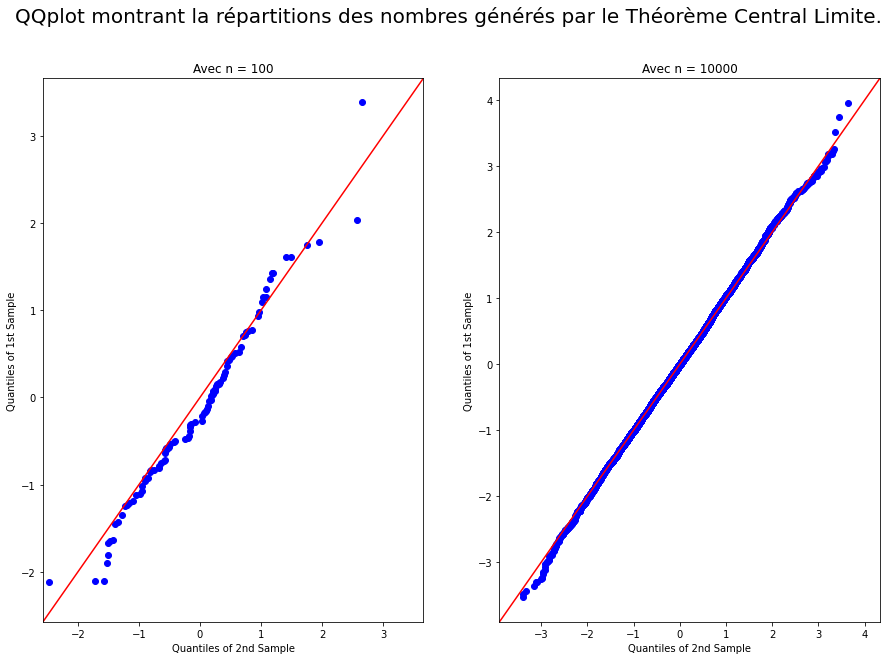

In [74]:
inline_qqplot(loi_normale_centrale_limite, [100, 10_000, 1_000_000], 'QQplot montrant la répartitions des nombres générés par le Théorème Central Limite.')

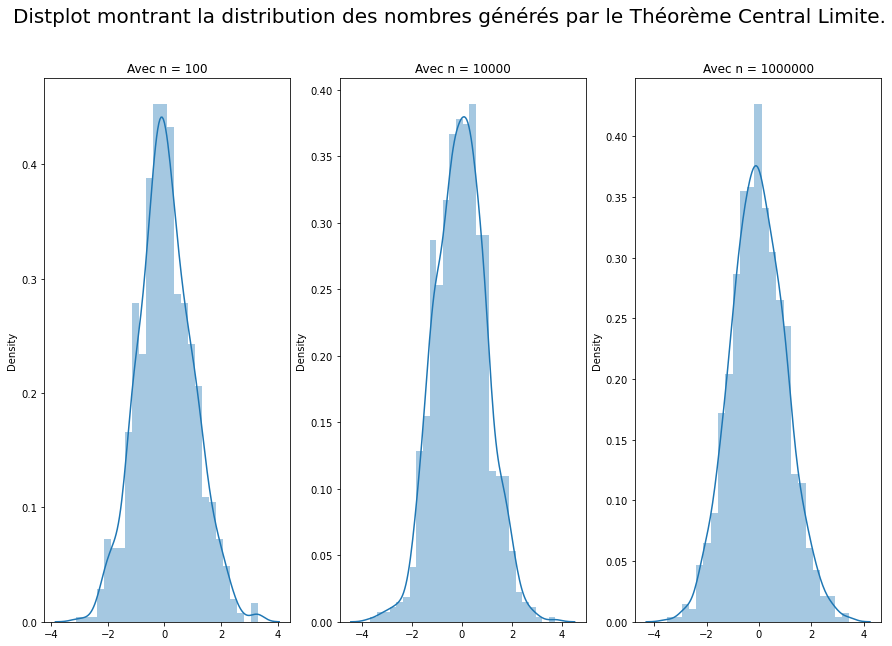

In [73]:
inline_distplot(loi_normale_centrale_limite, [100, 10_000, 1_000_000], 'Distplot montrant la distribution des nombres générés par le Théorème Central Limite.')

### 3 - Méthode de Box et Muller

...


Voici son implémentation en Python :

In [90]:
def box_muller(n: int):
    x1 = runif(n)
    x2 = runif(n)
    y1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * pi * x2)
    y2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * pi * x2)
    return y1, y2

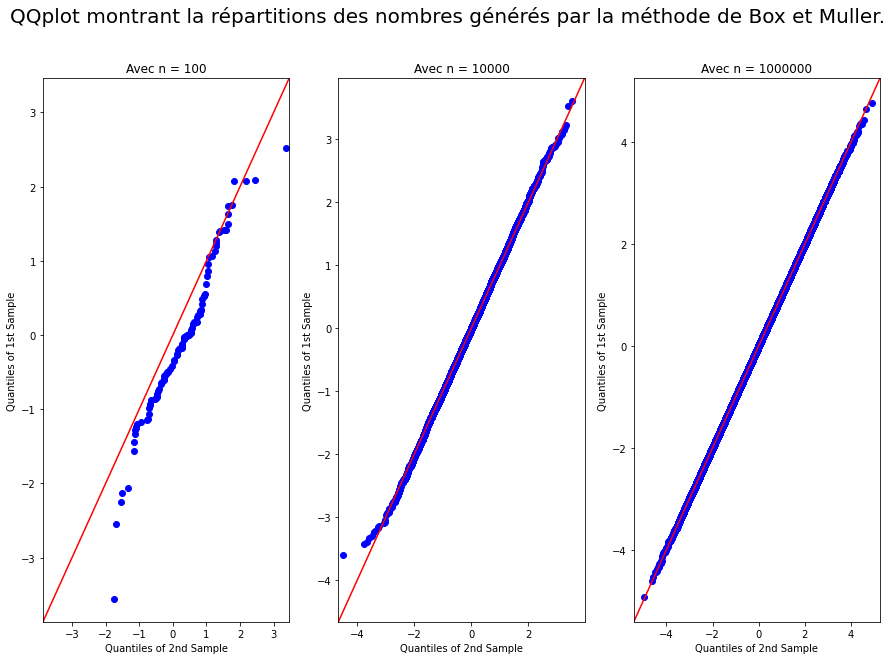

In [110]:
inline_qqplot_bm(box_muller, [100, 10_000, 1_000_000], 'QQplot montrant la répartitions des nombres générés par la méthode de Box et Muller.')

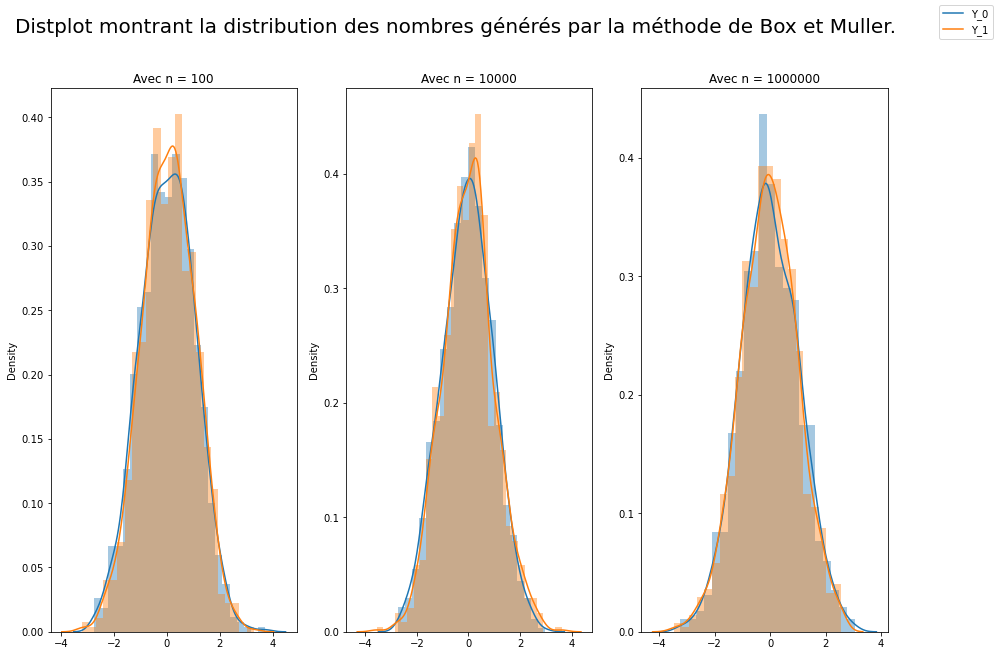

In [111]:
inline_distplot_bm(box_muller, [100, 10_000, 1_000_000], 'Distplot montrant la distribution des nombres générés par la méthode de Box et Muller.')

### 4 - Méthode du rejet

...

In [112]:
def gaussian_density(x):
    a = 1 / (sqrt(2) * pi)
    b = exp(-x * x / 2)
    return a * b

#### a - Enveloppe de Cauchy

...

Voici son implémentation en Python :

In [119]:
def cauchy(n: int) -> np.ndarray:
    res = [0 for _ in range(n)]
    c = sqrt(2 * pi / e)

    for i in range(n):
        u1 = random.uniform(0, 1)
        x = tan(pi * (u1 - 1 / 2))
        u2 = random.uniform(0, 1)
        res[i] = x

        while c * u2 / (pi * (1 + x * x)) > gaussian_density(x):
            u1 = random.uniform(0, 1)
            x = tan(pi * (u1 - 1 / 2))
            u2 = random.uniform(0, 1)
            res[i] = x

    return np.array(res)

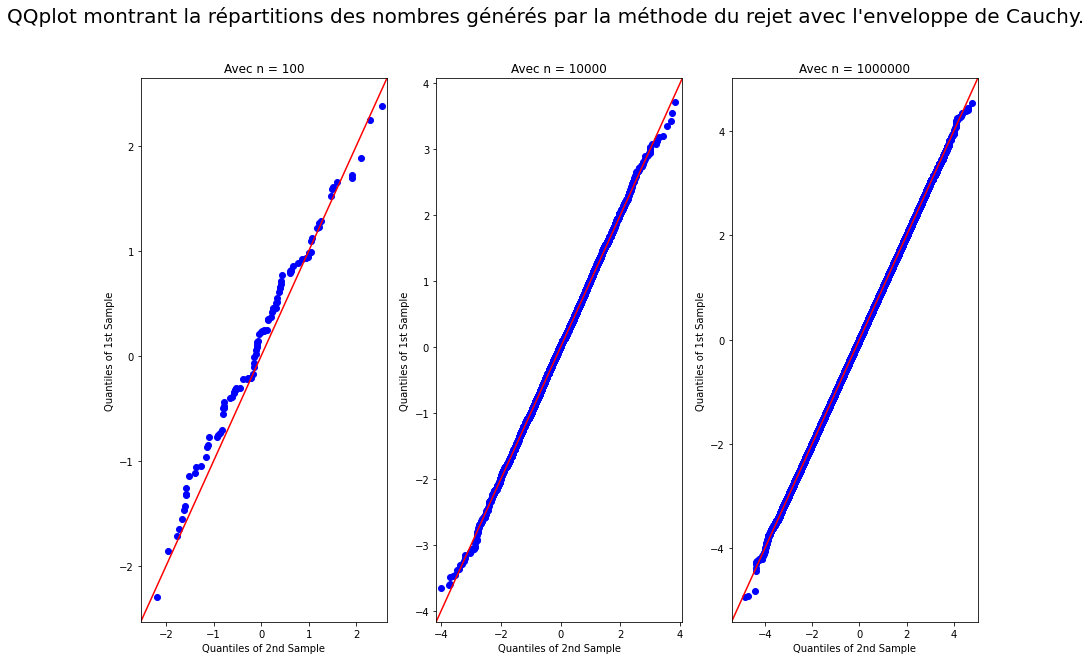

In [120]:
inline_qqplot(cauchy, [100, 10_000, 1_000_000], 'QQplot montrant la répartitions des nombres générés par la méthode du rejet avec l\'enveloppe de Cauchy.')

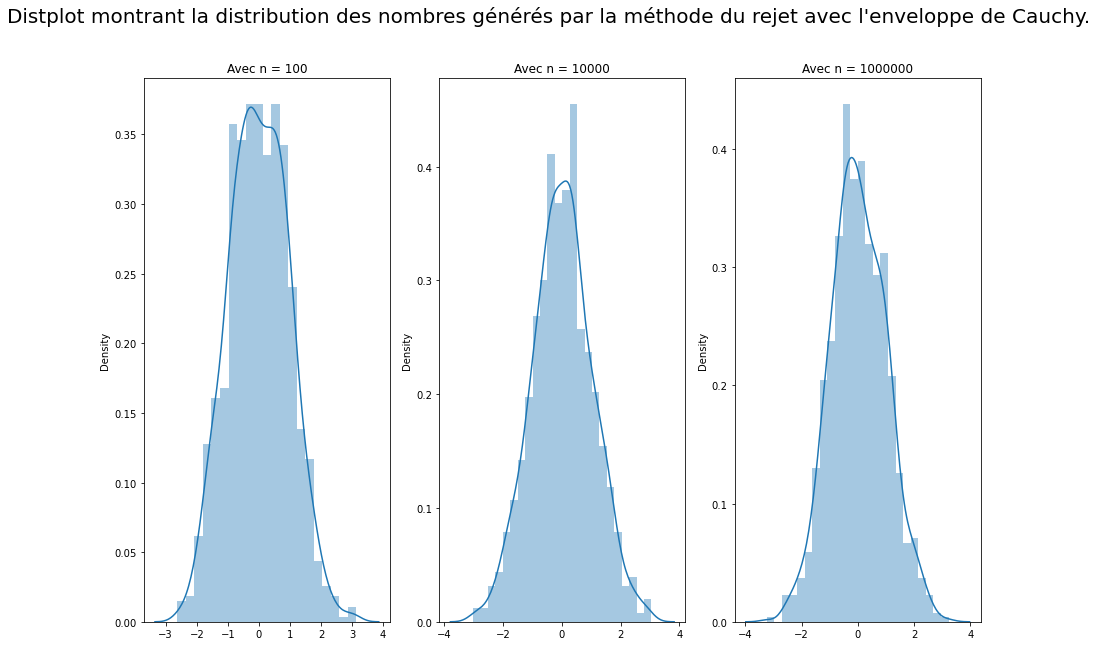

In [122]:
inline_distplot(cauchy, [100, 10_000, 1_000_000], 'Distplot montrant la distribution des nombres générés par la méthode du rejet avec l\'enveloppe de Cauchy.')

In [129]:
def laplace(n: int) -> np.ndarray:
    res = [0 for _ in range(n)]
    c = 2 * (sqrt(e / 2 * pi))
    b = 1
    mu = 0

    for i in range(n):
        u1 = random.uniform(0, 1)
        x = mu - b * np.sign(u1 - 0.5) * log(1 - 2 * abs(u1 - 0.5))
        u2 = random.uniform(0, 1)
        res[i] = x

        while c * u2 * 1 / 2 * exp(-abs(x)) > gaussian_density(x):
            u1 = random.uniform(0, 1)
            x = mu - b * np.sign(u1 - 0.5) * log(1 - 2 * abs(u1 - 0.5))
            u2 = random.uniform(0, 1)
            res[i] = x

    return np.array(res)

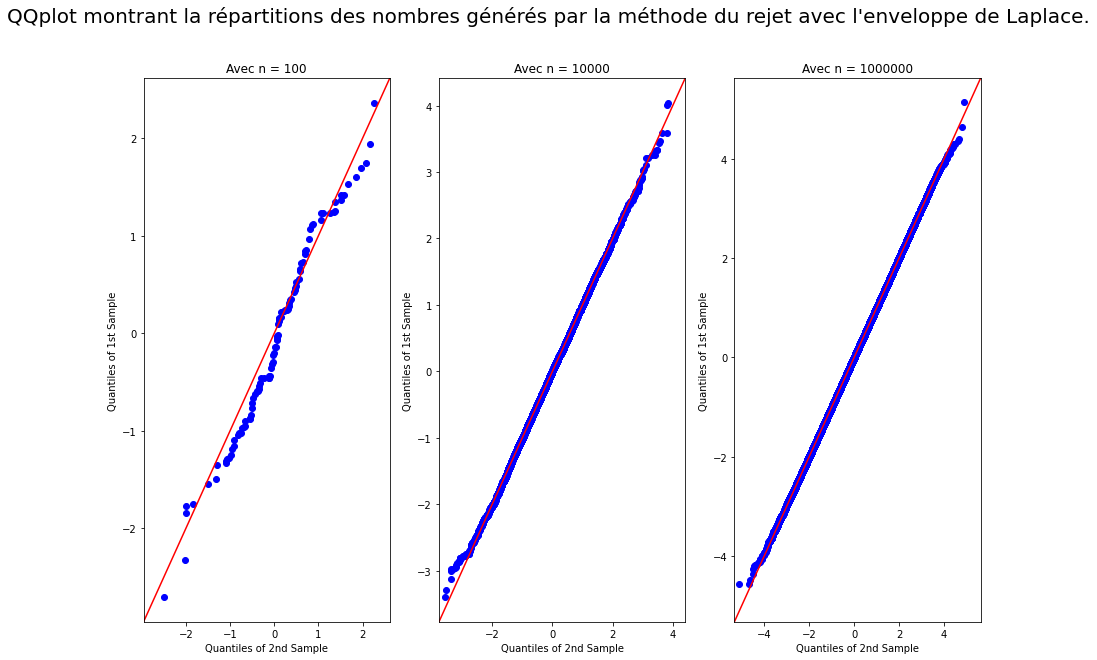

In [127]:
inline_qqplot(laplace, [100, 10_000, 1_000_000], 'QQplot montrant la répartitions des nombres générés par la méthode du rejet avec l\'enveloppe de Laplace.')

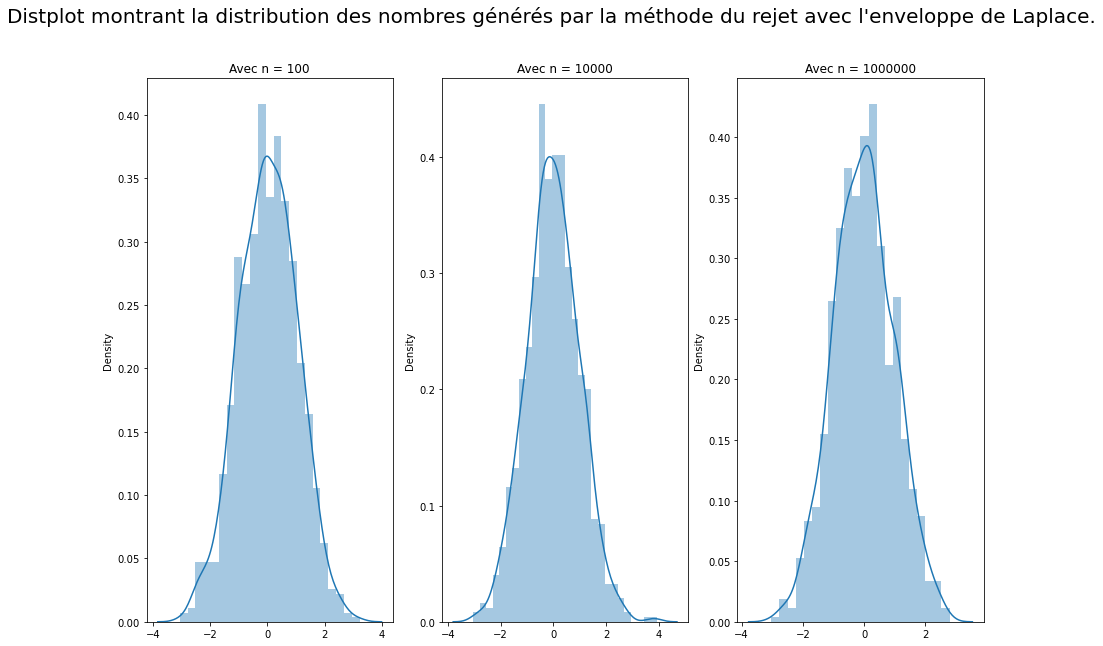

In [126]:
inline_distplot(laplace, [100, 10_000, 1_000_000], 'Distplot montrant la distribution des nombres générés par la méthode du rejet avec l\'enveloppe de Laplace.')

### 5 - Cas particuliers - Loi de Poisson

TODO ??

## II - Comparaison des différentes méthodes

In [136]:
NAMES = ['Loi Normale Inverse', 'Loi Normale Centrale Limite', 'Box et Muller (Y_0)', 'Enveloppe de Cauchy', 'Enveloppe de Laplace']
n = 10_000
# manque box muller
distributions = [loi_normale_rep_inv(n), loi_normale_centrale_limite(n), box_muller(n)[0], cauchy(n), laplace(n)]

data = {'Quartile 25%': [np.percentile(sublist, 25) for sublist in distributions],
        'Mean value': [mean(sublist) for sublist in distributions],
        'Quartile 75%': [np.percentile(sublist, 50) for sublist in distributions],
        'Variance': [np.var(sublist) for sublist in distributions],
        'Kurtosis (normalised)': [kurtosis(sublist) for sublist in distributions],
        'Skewness': [skew(sublist) for sublist in distributions]}

pd.DataFrame.from_dict(data, orient='index', columns=NAMES)

,Loi Normale Inverse,Loi Normale Centrale Limite,Box et Muller (Y_0),Enveloppe de Cauchy,Enveloppe de Laplace
Quartile 25%,-0.672251,-0.678094,-0.686644,-0.672662,-0.721680
Mean value,-0.002266,-0.012005,-0.010617,0.004105,-0.018675
Quartile 75%,-0.004353,-0.011603,0.000473,0.008970,-0.015517
Variance,1.001180,0.992393,1.001512,0.997339,1.026928
Kurtosis (normalised),0.065679,0.010910,-0.000606,0.057978,-0.142580
Skewness,-0.001621,-0.024347,-0.009666,0.008205,0.020161
